In [3]:
# This Python Script is created by Jialong Wang, entirely or mostly with the help of ChatGPT for CHEM 2671 Class
# Jialong Wang
# Sept. 12, 2024
# CHEM GA 2671, Fall 2024

# Import necessary libraries
import mdtraj as md
import numpy as np

# Load the ubiquitin structure from a PDB file
# Replace 'ubiquitin.pdb' with the actual path to your PDB file
ubiquitin = md.load('Data/1UBQ_processed.pdb')

################## Notes by Jialong below
################## I am using 1UBQ_processed.pdb version, if needed, use "ubiquitin = md.load('Data/1UBQ.pdb')" instead ##################

# a) Read in the ubiquitin structure
print("Ubiquitin structure loaded.")
print(f"Number of atoms: {ubiquitin.n_atoms}")
print(f"Number of residues: {ubiquitin.n_residues}")
print(f"Number of frames: {ubiquitin.n_frames}")

# b) Calculate and print the total number of hydrogen bonds
hbonds = md.baker_hubbard(ubiquitin, periodic=False)
print(f"Total number of hydrogen bonds: {len(hbonds)}")

# c) Compute the number of helical amino acids
# Use DSSP to compute the secondary structure
dssp = md.compute_dssp(ubiquitin)

# DSSP assigns a letter for each residue indicating its secondary structure:
# 'H' for alpha helix, 'E' for beta strand, etc.
helical_residues = np.sum(np.array(dssp) == 'H')
print(f"Number of helical residues: {helical_residues}")

# Print my ID
print("jw8872 Jialong Wang DO NOT COPY since it belongs to the course material")

# Optional: Print a breakdown of the secondary structure
unique, counts = np.unique(dssp, return_counts=True)
ss_counts = dict(zip(unique, counts))
print("Secondary structure breakdown:", ss_counts)


Ubiquitin structure loaded.
Number of atoms: 1405
Number of residues: 134
Number of frames: 1
Total number of hydrogen bonds: 57
Number of helical residues: 18
jw8872 Jialong Wang DO NOT COPY since it belongs to the course material
Secondary structure breakdown: {'C': 32, 'E': 26, 'H': 18, 'NA': 58}


Number of frames: 17
Number of atoms: 408
Number of residues: 26


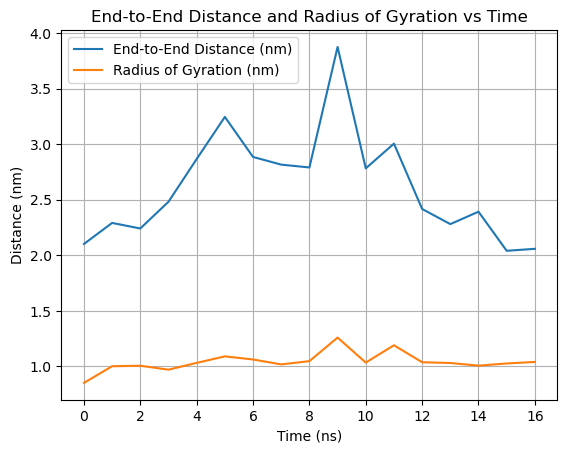

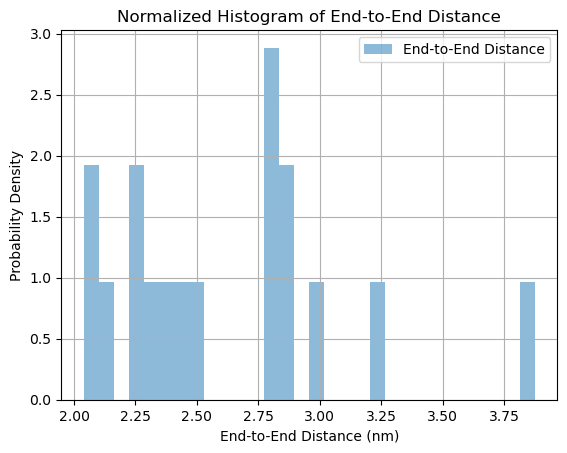

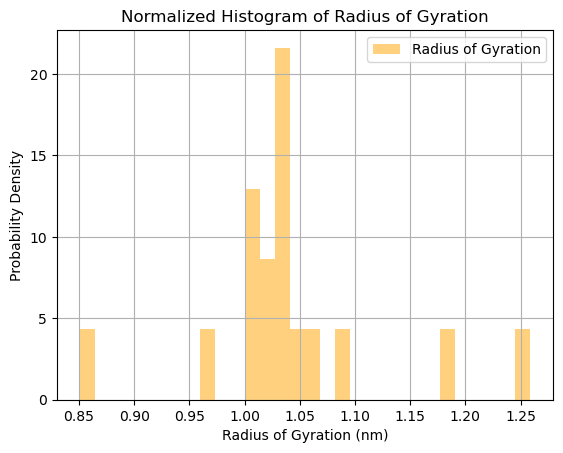

In [4]:
# This Python Script is created by Jialong Wang, entirely or mostly with the help of ChatGPT for CHEM 2671 Class
# Jialong Wang
# Sept. 12, 2024
# CHEM GA 2671, Fall 2024

############################## Step 6 Below
# Import necessary libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# a) Load the trajectory and topology
# Path to the starting topology file (.gro)
topology_file = 'Data/1hz3_T310.start.nowater.gro' #Thanks Prof. Hocky for the hint --- Jialong
# Path to the trajectory file (.xtc)
trajectory_file = 'Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc'

# Load the trajectory
trajectory = md.load(trajectory_file, top=topology_file)

# Print basic information about the trajectory
print(f"Number of frames: {trajectory.n_frames}")
print(f"Number of atoms: {trajectory.n_atoms}")
print(f"Number of residues: {trajectory.n_residues}")

# b) Compute end-to-end distance and radius of gyration at each time
# For end-to-end distance, select the first and last atom of the backbone
# assuming the first and last residue represent the ends of the protein
# Modify based on the actual end atoms if necessary
first_atom = trajectory.top.select('name CA')[0]  # CA of first residue
last_atom = trajectory.top.select('name CA')[-1]  # CA of last residue

# Compute end-to-end distance as the distance between first and last atom
end_to_end_distance = md.compute_distances(trajectory, [[first_atom, last_atom]])

# Compute radius of gyration for each frame
radius_of_gyration = md.compute_rg(trajectory)

# c) Plot end-to-end distance and radius of gyration vs time on the same plot
time = trajectory.time / 1000  # Convert time to nanoseconds (trajectory.time is in picoseconds)

plt.figure()
plt.plot(time, end_to_end_distance, label='End-to-End Distance (nm)')
plt.plot(time, radius_of_gyration, label='Radius of Gyration (nm)')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
plt.title('End-to-End Distance and Radius of Gyration vs Time')
plt.legend()
plt.grid(True)
plt.show()

# d) Plot normalized histograms of end-to-end distance and radius of gyration

# Normalize the histograms by using density=True
plt.figure()
plt.hist(end_to_end_distance, bins=30, density=True, alpha=0.5, label='End-to-End Distance')
plt.xlabel('End-to-End Distance (nm)')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram of End-to-End Distance')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.hist(radius_of_gyration, bins=30, density=True, alpha=0.5, label='Radius of Gyration', color='orange')
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram of Radius of Gyration')
plt.grid(True)
plt.legend()
plt.show()
